## Import modules

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import json
from matplotlib import pyplot as plt

## Import dataset

### About this dataset

This synthetic dataset contains 18 months worth of daily performance and attrition data (411,948 observations) for a factory whose organizational structure comprises 508 workers. Due to employee turnover, a total of 687 persons appear in the dataset. 

The dataset’s observations cover both regular daily events (like workers’ attendance and daily level of Efficacy) and special one-time events (like accidents, an employee’s termination, or the onboarding of a new employee). A unique feature of the dataset is diverse causal relationships “hidden” within the data that are waiting to be uncovered through machine learning.

Source: https://www.kaggle.com/datasets/gladdenme/factory-workers-daily-performance-attrition-s?resource=download

In [2]:
# Dataset 
pd.set_option('display.max_columns', None)
workers_df = pd.read_csv("../data/raw/factory_workers.csv", sep=',', encoding="mac_roman")

## Explore Dataset

In [3]:
workers_df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_fname,sup_lname,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,event_week_in_series,event_day_in_series,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.489,Efficacy,None,1.2,None,None
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.023,Efficacy,None,0.8,None,None
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714285714,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,Susan,Dahl,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None


## Understanding the Columns

### Lookup Function

**Curious about what a specific column heading may mean?**

Use the provided lookup function, `get_column_desc()`, to find a description of what the values mean in that particular column.

In [4]:
# Import metadata for getting column descriptions
with open("../data/raw/metadata.json") as file:
    column_descriptions = json.load(file)


In [5]:
# Define a lookup function for getting the description of a column name
def get_column_desc(col_name, info=column_descriptions):
    """
    Provides a lookup function for a description of the column name. 
    
    Use if interested in the description of a particular column name, and what type of field it is. 
    
    Parameters:
    col_name(str): The column name you wish to lookup
    info(dict): A dictionary containing the information
    
    Returns: 
    dict: Returns column name, its type of field and its description.
    
    """
    return info[col_name]["Description"]

In [6]:
# Lookup description for 'sup_goodness_h' column 
get_column_desc('record_cause')

'In the case of a Termination event, this string indicates the reason for which the organization terminated the subject’s employment. For other event types, this field will be “None”.'

In [7]:
workers_df.index

RangeIndex(start=0, stop=411948, step=1)

In [8]:
workers_df.shape

(411948, 42)

In [9]:
# Find missing values per columns
missing_values = pd.concat([workers_df.isnull().sum(), 100*workers_df.isnull().mean()], axis=1)
missing_values.columns = ['Count', '%']
missing_values.sort_values(by=['Count','%'], ascending=False)

,Count,%
recorded_note_from_sup,358,0.086904
sub_ID,0,0.000000
sub_fname,0,0.000000
sub_lname,0,0.000000
sub_age,0,0.000000
sub_sex,0,0.000000
sub_shift,0,0.000000
sub_team,0,0.000000
sub_role,0,0.000000
sub_coll_IDs,0,0.000000


### Initial Exploration of the Data

There were 77 reported resignations over the 18 month period.

In [10]:
resignations = workers_df[workers_df["record_comptype"] == "Resignation"]
resignations['record_comptype'].count()

77

### There were 7 distinct reasons for resignation, according to those that resigned:

In [11]:
reasons_for_resignations = resignations.behav_cause_h
reasons_for_resignations.unique()

array(['Poor Teammates', 'Underrecorded Efficacy', 'Recruited Away',
       'Low Commitment', 'Ethically Inferior Supervisor'], dtype=object)

The reason for resignation with the highest frequency is "Low Commitment", followed by "Underrecorded Efficacy" and "Ethically inferior supervisor"

<Axes: title={'center': 'Reasons for Resignation by Count'}, xlabel='Resignation Reason'>

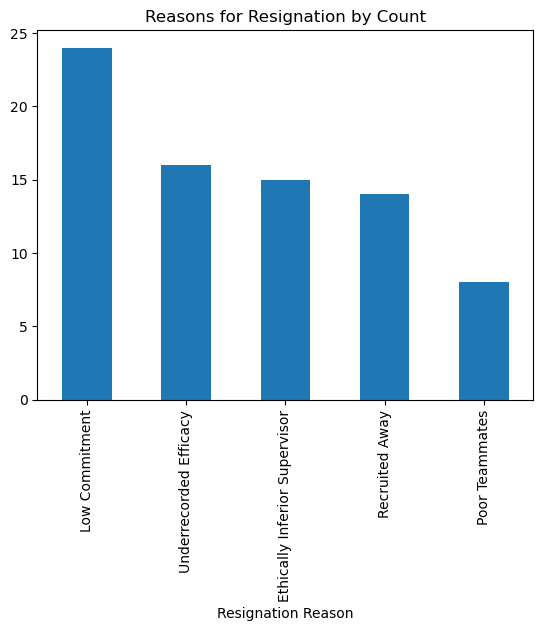

In [12]:
resignation_reason_and_count = resignations.groupby(['behav_cause_h'])['behav_cause_h'].count().sort_values(ascending=False)
resignation_reason_and_count.plot(kind="bar", title="Reasons for Resignation by Count", xlabel="Resignation Reason")

### ***Drop unnecessary columns***

In [13]:
# drop unnecessary columns
unnecessary_cols = ['sub_fname', 'sub_lname','sub_coll_IDs', 'sub_colls_same_sex_prtn','sup_fname', 'sup_lname','event_week_in_series',
 'event_day_in_series','event_weekday_num', 'event_weekday_name', 'recorded_note_from_sup', 'record_conf_matrix_h']

df = workers_df.drop(columns=unnecessary_cols)

In [14]:
# drop all rows with production director
df = df[df['sub_role'] != 'Production Director']

### ***Fix column types***

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411136 entries, 0 to 411947
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sub_ID                411136 non-null  int64  
 1   sub_age               411136 non-null  int64  
 2   sub_sex               411136 non-null  object 
 3   sub_shift             411136 non-null  object 
 4   sub_team              411136 non-null  object 
 5   sub_role              411136 non-null  object 
 6   sub_health_h          411136 non-null  float64
 7   sub_commitment_h      411136 non-null  float64
 8   sub_perceptiveness_h  411136 non-null  float64
 9   sub_dexterity_h       411136 non-null  float64
 10  sub_sociality_h       411136 non-null  float64
 11  sub_goodness_h        411136 non-null  float64
 12  sub_strength_h        411136 non-null  float64
 13  sub_openmindedness_h  411136 non-null  float64
 14  sub_workstyle_h       411136 non-null  object 
 15  

In [16]:
# convert columns to appropriate types
cols_to_convert = {'sup_age':int, 'sup_sub_age_diff':int, 'sup_commitment_h':float, 'sup_perceptiveness_h':float,
       'sup_goodness_h':float,}

df = df.astype(cols_to_convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411136 entries, 0 to 411947
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sub_ID                411136 non-null  int64  
 1   sub_age               411136 non-null  int64  
 2   sub_sex               411136 non-null  object 
 3   sub_shift             411136 non-null  object 
 4   sub_team              411136 non-null  object 
 5   sub_role              411136 non-null  object 
 6   sub_health_h          411136 non-null  float64
 7   sub_commitment_h      411136 non-null  float64
 8   sub_perceptiveness_h  411136 non-null  float64
 9   sub_dexterity_h       411136 non-null  float64
 10  sub_sociality_h       411136 non-null  float64
 11  sub_goodness_h        411136 non-null  float64
 12  sub_strength_h        411136 non-null  float64
 13  sub_openmindedness_h  411136 non-null  float64
 14  sub_workstyle_h       411136 non-null  object 
 15  

### Create Column with Target Variable

In [17]:
# Add a new column named 'Resigned' for target variable
df['Resigned'] = [1 if x =='Resignation' else 0 for x in df['behav_comptype_h']]
df

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,Resigned
0,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,None,Presence,None,None,0
1,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,None,1.489,Efficacy,None,1.2,0
2,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,None,Presence,None,None,0
3,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,None,1.023,Efficacy,None,0.8,0
4,98000003,20,F,Shift 1,Team 3,Team Leader,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,None,Presence,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411943,98000787,28,F,Shift 3,Team 21,Laborer,0.749,0.801,0.763,0.795,0.593,0.977,0.767,0.613,Group C,98000021,25,-3,M,Team Leader,0.868,0.934,0.521,6/30/2022,Sacrifice,None,None,Sacrifice,None,None,0
411944,98000788,47,F,Shift 1,Team 6,Laborer,0.436,0.926,0.813,0.781,0.706,0.438,0.812,0.687,Group A,98000006,28,-19,F,Team Leader,0.682,0.447,0.507,6/30/2022,Presence,None,None,Presence,None,None,0
411945,98000788,47,F,Shift 1,Team 6,Laborer,0.436,0.926,0.813,0.781,0.706,0.438,0.812,0.687,Group A,98000006,28,-19,F,Team Leader,0.682,0.447,0.507,6/30/2022,Efficacy,None,0.261,Efficacy,None,0.3,0
411946,98000789,34,M,Shift 2,Team 12,Laborer,0.709,0.519,0.975,0.730,0.819,0.838,0.924,0.631,Group B,98000012,53,19,F,Team Leader,0.945,0.514,0.966,6/30/2022,Presence,None,None,Presence,None,None,0


### Get a count of Events for each employee

In [18]:
# drop unnecessary events
events = list(df['record_comptype'].unique())
events.pop(11)
events.pop(11)
events.pop(11)
events

['Presence',
 'Efficacy',
 'Feat',
 'Slip',
 'Sacrifice',
 'Lapse',
 'Idea',
 'Teamwork',
 'Absence',
 'Disruption',
 'None',
 'Sabotage']

In [19]:
# Group by sub_id and record_comptype
groups = df.groupby('sub_ID')['record_comptype']

In [20]:
# get the counts of events for each sub_ID
event_count = {}
for id in df['sub_ID'].unique():
    event_count[id] = groups.get_group(id).value_counts().to_dict()
event_count

{98000001: {'Presence': 380,
  'Efficacy': 380,
  'Teamwork': 13,
  'Absence': 10,
  'Idea': 9,
  'Sacrifice': 9,
  'Lapse': 7,
  'None': 7,
  'Feat': 4,
  'Disruption': 4,
  'Slip': 3},
 98000002: {'Presence': 375,
  'Efficacy': 375,
  'Absence': 15,
  'Teamwork': 8,
  'Sacrifice': 7,
  'Feat': 6,
  'None': 4,
  'Idea': 3,
  'Lapse': 2,
  'Slip': 1,
  'Disruption': 1,
  'Sabotage': 1},
 98000003: {'Presence': 373,
  'Efficacy': 373,
  'Absence': 17,
  'Teamwork': 10,
  'Feat': 6,
  'None': 6,
  'Idea': 5,
  'Sacrifice': 5,
  'Lapse': 1},
 98000004: {'Presence': 375,
  'Efficacy': 375,
  'Absence': 15,
  'Sacrifice': 13,
  'Feat': 7,
  'None': 5,
  'Teamwork': 5,
  'Idea': 5,
  'Slip': 2,
  'Lapse': 1},
 98000005: {'Presence': 381,
  'Efficacy': 381,
  'Absence': 9,
  'Teamwork': 8,
  'Idea': 7,
  'Sacrifice': 5,
  'Lapse': 5,
  'None': 5,
  'Slip': 4,
  'Disruption': 4,
  'Feat': 3},
 98000006: {'Presence': 379,
  'Efficacy': 379,
  'Feat': 15,
  'Absence': 11,
  'Teamwork': 8,
  'Lap

In [21]:
# create a dataframe with counts of each event by sub_id
events_df = pd.DataFrame(event_count)

# transpose df
events_df = events_df.T

# drop unneccesary cols
events_df.drop(columns=['Termination', 'Resignation', 'Onboarding'], inplace=True)

# fill NaN values with 0s if no event recorded for that worker
events_df = events_df.fillna(0)

# convert column dtypes to int
events_df.astype(int)

,Presence,Efficacy,Teamwork,Absence,Idea,Sacrifice,Lapse,None,Feat,Disruption,Slip,Sabotage
98000001,380,380,13,10,9,9,7,7,4,4,3,0
98000002,375,375,8,15,3,7,2,4,6,1,1,1
98000003,373,373,10,17,5,5,1,6,6,0,0,0
98000004,375,375,5,15,5,13,1,5,7,0,2,0
98000005,381,381,8,9,7,5,5,5,3,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98000785,20,20,0,0,0,1,0,0,0,0,0,0
98000786,11,11,1,0,0,0,0,2,2,1,0,0
98000787,11,11,0,0,0,1,1,0,0,0,0,0
98000788,4,4,0,0,0,0,1,1,0,0,0,0


## Get a count of mismatched efficacy and behaviour

Since underrecorded efficacy and ethically inferior supervisors are amongst the top three reasons employees resigned, we should aim to preserve records/count that highlights this.

### Count of Underrecorded Efficacies Reported by Sup

In [88]:
# Find records where Efficacies is underrepresented by Sup
mismatched_efficacy = df[df['recorded_efficacy'] < df['actual_efficacy_h']]

# Get a count of underrecorded records grouped by sub_id
efficacy = mismatched_efficacy.groupby('sub_ID')['actual_efficacy_h'].count().reset_index()

# Rename column more appropriately
efficacy.rename(columns={'actual_efficacy_h':'Num Underrecorded Efficacy'}, inplace=True)
efficacy

,sub_ID,Num Underrecorded Efficacy
0,98000001,185
1,98000002,202
2,98000003,194
3,98000004,183
4,98000005,181
...,...,...
680,98000785,9
681,98000786,5
682,98000787,7
683,98000788,1


### Count of Mismatched Behaviors Recorded by Sup

In [89]:
# Find records where actual behave is misrecorded
mismatched_behav_df = df[df['behav_comptype_h'] != df['record_comptype']]

# Get a count of mismatched records grouped by sub_id
mm_behav_count = mismatched_behav_df.groupby('sub_ID')['behav_comptype_h'].count().reset_index()

# Rename column more appropriately
behavior.rename(columns={'behav_comptype_h':'Num Mismatched Behav'}, inplace=True)
behavior

,sub_ID,Num Mismatched Behav
0,98000001,7
1,98000002,4
2,98000003,6
3,98000004,5
4,98000005,5
...,...,...
627,98000777,1
628,98000778,1
629,98000783,2
630,98000786,2


In [156]:
df[df['record_comptype'] == 'Resignation']

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,Resigned
1056,98000112,61,F,Shift 1,Team 5,Laborer,0.437,0.804,0.819,0.783,0.918,0.353,0.609,0.502,Group D,98000005,59,-2,F,Team Leader,0.629,0.678,0.686,1/1/2021,Resignation,Poor Teammates,None,Resignation,None,None,1
1057,98000462,63,M,Shift 3,Team 22,Laborer,0.970,0.793,0.653,0.630,0.855,0.830,0.688,0.722,Group A,98000022,47,-16,F,Team Leader,0.596,0.810,0.646,1/1/2021,Resignation,Underrecorded Efficacy,None,Resignation,None,None,1
2116,98000264,61,F,Shift 2,Team 12,Laborer,0.545,0.798,0.833,0.949,0.737,0.816,0.919,0.575,Group A,98000012,53,-8,F,Team Leader,0.945,0.514,0.966,1/4/2021,Resignation,Recruited Away,None,Resignation,None,None,1
5273,98000239,46,M,Shift 2,Team 11,Laborer,0.879,0.651,0.814,0.665,0.614,0.920,0.709,0.979,Group D,98000011,46,0,M,Team Leader,0.848,0.805,0.572,1/7/2021,Resignation,Low Commitment,None,Resignation,None,None,1
8406,98000482,60,M,Shift 3,Team 23,Laborer,0.731,0.685,0.831,0.747,0.812,0.798,0.947,0.776,Group B,98000023,36,-24,F,Team Leader,0.966,0.581,0.912,1/12/2021,Resignation,Underrecorded Efficacy,None,Resignation,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351706,98000765,55,M,Shift 3,Team 21,Laborer,0.625,0.636,0.864,0.602,0.933,0.997,0.483,0.594,Group A,98000021,25,-30,M,Team Leader,0.868,0.934,0.521,4/12/2022,Resignation,Ethically Inferior Supervisor,None,Resignation,None,None,1
384396,98000640,47,F,Shift 2,Team 10,Laborer,0.730,0.653,0.620,0.768,0.484,0.828,0.803,0.967,Group A,98000010,29,-18,M,Team Leader,0.683,0.384,0.436,5/25/2022,Resignation,Low Commitment,None,Resignation,None,None,1
387610,98000040,21,F,Shift 1,Team 1,Laborer,0.447,0.606,0.891,0.833,0.456,0.861,0.436,0.607,Group D,98000001,40,19,F,Team Leader,1.000,0.659,0.501,5/30/2022,Resignation,Low Commitment,None,Resignation,None,None,1
400307,98000727,54,M,Shift 1,Team 8,Laborer,0.423,0.898,0.757,0.506,0.556,0.929,0.456,0.320,Group A,98000680,59,5,M,Team Leader,0.774,0.975,0.782,6/15/2022,Resignation,Recruited Away,None,Resignation,None,None,1


In [114]:
# Get the id of the director to exclude from list of sub_ids
director_id = 98000252

In [126]:
# Create a list of unique sub ids
sub_ids = pd.Series(df['sub_ID'].unique())

In [132]:
# list of sub_ids not found in behavior and efficacy
missing_behav = sub_ids[sub_ids.isin(behavior['sub_ID']) == False].to_list()
missing_efficacy = sub_ids[sub_ids.isin(efficacy['sub_ID'])==False].to_list()

In [140]:
len(missing_behav)

54

## Problem: if no mismatch records for a particular worker, fill count with 0

Fill the behavior and efficacy dataframe with missing sub_ids and counts = 0

In [153]:
keys = missing_behav
values = [0]*54
df2 = {k:v for (k,v) in zip(keys,values)}
#df2 = pd.DataFrame(df2)
df2
#behavior = pd.concat([behavior, df2], ignore_index=True, sort=True)
#behavior

{98000062: 0,
 98000077: 0,
 98000112: 0,
 98000138: 0,
 98000239: 0,
 98000263: 0,
 98000264: 0,
 98000272: 0,
 98000282: 0,
 98000324: 0,
 98000371: 0,
 98000462: 0,
 98000481: 0,
 98000482: 0,
 98000487: 0,
 98000607: 0,
 98000609: 0,
 98000612: 0,
 98000633: 0,
 98000638: 0,
 98000658: 0,
 98000662: 0,
 98000681: 0,
 98000685: 0,
 98000692: 0,
 98000706: 0,
 98000710: 0,
 98000713: 0,
 98000714: 0,
 98000721: 0,
 98000723: 0,
 98000736: 0,
 98000739: 0,
 98000741: 0,
 98000746: 0,
 98000751: 0,
 98000753: 0,
 98000755: 0,
 98000758: 0,
 98000759: 0,
 98000763: 0,
 98000770: 0,
 98000773: 0,
 98000774: 0,
 98000775: 0,
 98000776: 0,
 98000779: 0,
 98000780: 0,
 98000781: 0,
 98000782: 0,
 98000784: 0,
 98000785: 0,
 98000787: 0,
 98000789: 0}

### Merge Behavior and Efficacy dfs

In [85]:
# Merge the two counts
behav_eff = behavior.merge(efficacy, on='sub_ID')
behav_eff

,sub_ID,Num Mismatched Behav,actual_efficacy_h
0,98000001,7,185
1,98000002,4,202
2,98000003,6,194
3,98000004,5,183
4,98000005,5,181
...,...,...,...
627,98000777,1,24
628,98000778,1,11
629,98000783,2,12
630,98000786,2,5
